In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [2]:
sdf_ini = src.read_csv('../Data/initial_distribution/toy_star.csv')

In [3]:
dm = 1/len(sdf_ini)
hfact = 1.2

In [4]:
sdf_ini.params={'mass':dm, 'hfact':hfact}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,rho
0,-0.1250,-0.25,-0.6875,0,0,0,0.075,0.575039
1,-0.0625,-0.25,-0.6875,0,0,0,0.075,0.575039
2,0.0000,-0.25,-0.6875,0,0,0,0.075,0.575039
3,0.0625,-0.25,-0.6875,0,0,0,0.075,0.575039
4,0.1250,-0.25,-0.6875,0,0,0,0.075,0.575039
...,...,...,...,...,...,...,...,...
7118,-0.1250,0.25,0.6875,0,0,0,0.075,0.575039
7119,-0.0625,0.25,0.6875,0,0,0,0.075,0.575039
7120,0.0000,0.25,0.6875,0,0,0,0.075,0.575039
7121,0.0625,0.25,0.6875,0,0,0,0.075,0.575039


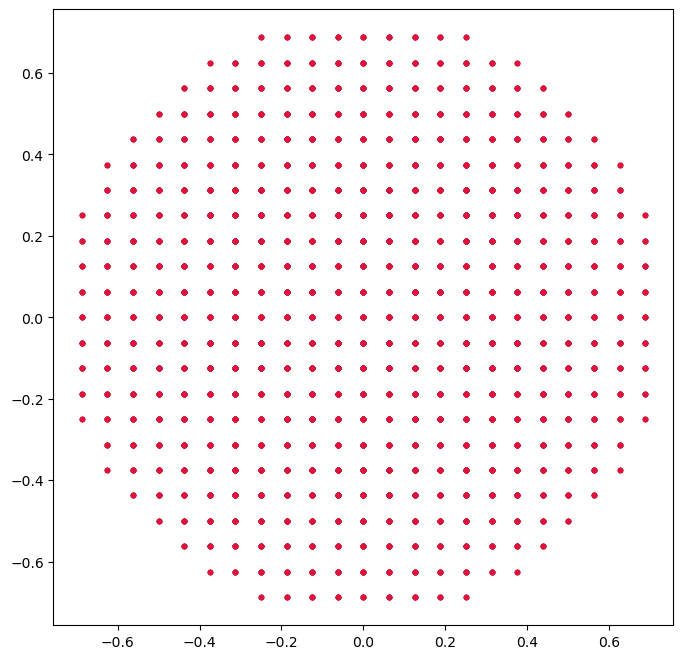

In [5]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
plt.show()

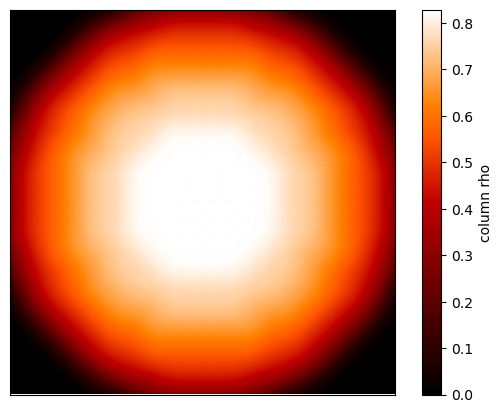

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', ax=ax, rotation=[0,0,0])

In [7]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.122443,-0.234374,-0.599907,-0.000248,0.000077,0.000143,0.090000,0.015977,0.332772
1,-0.054785,-0.244880,-0.605556,0.000013,-0.000213,0.000212,0.089945,0.015976,0.333383
2,-0.000000,-0.249233,-0.606946,0.000000,-0.000213,0.000331,0.090190,0.015981,0.330678
3,0.054785,-0.244880,-0.605556,-0.000013,-0.000213,0.000212,0.089945,0.015976,0.333383
4,0.122443,-0.234374,-0.599907,0.000248,0.000077,0.000143,0.090000,0.015977,0.332772
...,...,...,...,...,...,...,...,...,...
7118,-0.122443,0.234374,0.599907,-0.000248,-0.000077,-0.000143,0.090000,0.015977,0.332772
7119,-0.054785,0.244880,0.605556,0.000013,0.000213,-0.000212,0.089945,0.015976,0.333383
7120,0.000000,0.249233,0.606946,0.000000,0.000213,-0.000331,0.090190,0.015981,0.330678
7121,0.054785,0.244880,0.605556,-0.000013,0.000213,-0.000212,0.089945,0.015976,0.333383


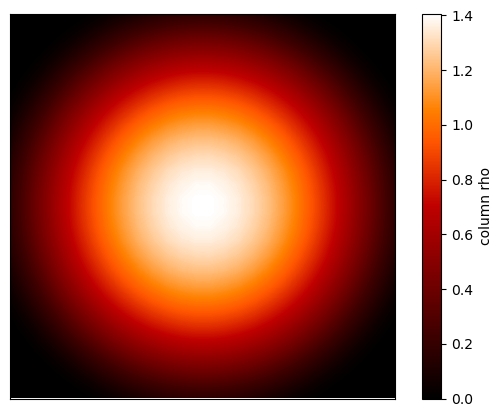

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

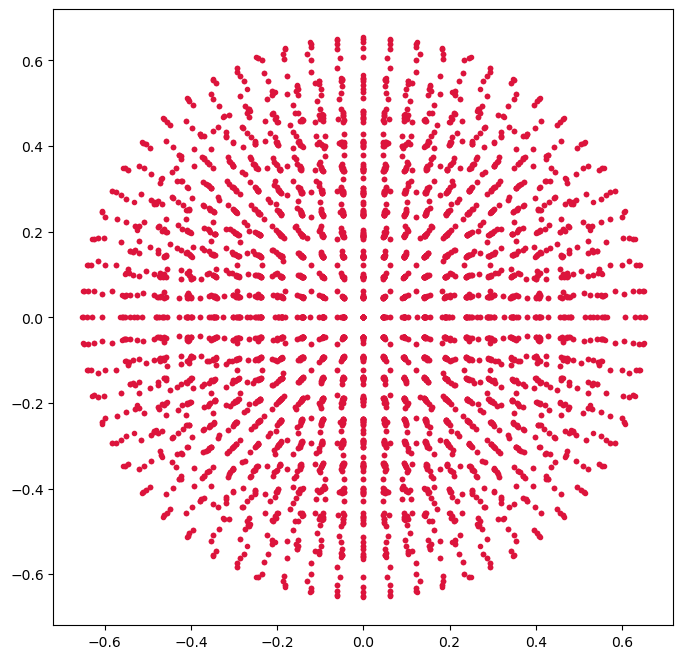

In [9]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [10]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [11]:
R = 0.75
k = 0.05
M = 1.0
n = 1.0
lmbda = 15*M*k/(2*np.pi*R**5) # This value is valid for gamma=2.0

In [12]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

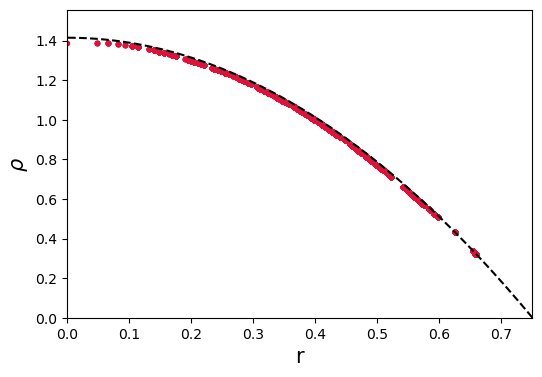

In [14]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2+sdf['z']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.xlim(0., R)
plt.ylim(0., 1.1*lmbda/(4*k)*(R**2))
plt.xlabel("r", fontsize=15)
plt.ylabel(r"$\rho$", fontsize=15)
plt.savefig("ToyStar.png", transparent=True)
plt.show()